# **Analisis Kerentanan Suatu Daerah di Indonesia terhadap Banjir dan Tanah Longsor berdasarkan Total Dampak Fisik, Jumlah Penduduk dan Topografi Wilayah Tahun 2023**

Anggota Kelompok 4

1. Anggi Nur Zavira (1314622009), Statistika UNJ
2. Ananda Keissa Az Zahra (24031554051), Sains Data UNESA


## **Read data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_penduduk = pd.read_excel('jumlah_penduduk.xlsx',skiprows=2)
df_penduduk

,id,tahun,semester,prov,jumlah_penduduk,jumlah_penduduk_km2
0,1,2018,2,PAPUA BARAT,1140698,11.444561
1,2,2018,2,MALUKU UTARA,1307802,40.891175
2,3,2018,2,MALUKU,1847083,39.371655
3,4,2018,2,GORONTALO,1180645,104.880311
4,5,2018,2,SULAWESI TENGGARA,2635423,69.229898
...,...,...,...,...,...,...
241,242,2023,1,PAPUA BARAT,562214,60275.310000
242,243,2023,1,PAPUA SELATAN,526777,117849.159000
243,244,2023,1,PAPUA TENGAH,1351659,61072.913000
244,245,2023,1,PAPUA PEGUNUNGAN,1461492,51213.330000


In [ ]:
df_bencana = pd.read_csv('Data Bencana 2023.csv', skiprows=1)
df_bencana

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3201 101 2023 012 031 1,3201,12/31/2023,BANJIR,Kec. Katapang Ds. Banyusari Kec. Tajurhalang,BOGOR,JAWA BARAT,Dokumentasi,●Dipicu oleh hujan dengan intensitas tinggi,NaN,NaN,NaN,0,660.0,1
1,2,1613 101 2023 012 031 1,1613,12/31/2023,BANJIR,Kec. Rupit Ds. Noman Ds. Noman Baru Ds. Batu ...,MUSI RAWAS UTARA,SUMATERA SELATAN,Dokumentasi,●Hujan dengan intensitas sedang - tinggi yang ...,NaN,NaN,NaN,1,4031.0,1
2,3,3215 101 2023 012 031 1,3215,12/31/2023,BANJIR,Kec. Teluk Jambe Ds. Karang Liar,KARAWANG,JAWA BARAT,Dokumentasi,●Hujan deras di wilayah hulu dan beberapa wila...,NaN,NaN,NaN,0,662.0,10
3,4,5205 105 2023 012 031 1,5205,12/31/2023,CUACA EKSTREM,Woja,DOMPU,NUSA TENGGARA BARAT,Dokumentasi,NaN,NaN,NaN,NaN,1,NaN,0
4,5,3204 108 2023 012 031 1,3204,12/31/2023,GEMPABUMI,Kec. Arjasari Ds. Pinggirsari Kec. Cicalengka...,BANDUNG,JAWA BARAT,Dokumentasi,Gempa Pertama Kekuatan : 4.1 SR Tangg...,NaN,NaN,NaN,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,5611,5201 105 2023 01 01 1,5201,1/1/2023,CUACA EKSTREM,"Batulayar, Seteluk",LOMBOK BARAT,NUSA TENGGARA BARAT,Dokumentasi,NaN,NaN,NaN,NaN,0,NaN,1
5611,5612,1674 107 2023 01 01 1,1674,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,KOTA PRABUMULIH,SUMATERA SELATAN,Dokumentasi,●Dalam proses penyelidikan,NaN,NaN,NaN,0,NaN,0
5612,5613,6309 107 2023 01 01 1,6309,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,TABALONG,KALIMANTAN SELATAN,Dokumentasi,●Masih dalam proses Penyelidikan,NaN,NaN,NaN,0,NaN,0
5613,5614,1602 107 2023 01 01 1,1602,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,OGAN KOMERING ILIR,SUMATERA SELATAN,Dokumentasi,●Dalam proses penyelidikan,NaN,NaN,NaN,0,NaN,0


In [ ]:
df_topografi = pd.read_csv('topografi wilayah.csv')[:34]
df_topografi

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran
0,Aceh,153.0,2011.0,4350.0
1,Sumatera Utara,99.0,3971.0,2062.0
2,Sumatera Barat,5.0,617.0,665.0
3,Riau,1.0,328.0,1547.0
4,Jambi,6.0,450.0,1106.0
5,Sumatera Selatan,20.0,726.0,2546.0
6,Bengkulu,25.0,1137.0,352.0
7,Lampung,1.0,616.0,2037.0
8,Kepulauan Bangka Belitung,NaN,25.0,368.0
9,Kepulauan Riau,2.0,250.0,176.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Cleaning**

Mengatasi NaN

In [ ]:
df_penduduk.fillna(0)

,id,tahun,semester,prov,jumlah_penduduk,jumlah_penduduk_km2
0,1,2018,2,PAPUA BARAT,1140698,11.444561
1,2,2018,2,MALUKU UTARA,1307802,40.891175
2,3,2018,2,MALUKU,1847083,39.371655
3,4,2018,2,GORONTALO,1180645,104.880311
4,5,2018,2,SULAWESI TENGGARA,2635423,69.229898
...,...,...,...,...,...,...
241,242,2023,1,PAPUA BARAT,562214,60275.310000
242,243,2023,1,PAPUA SELATAN,526777,117849.159000
243,244,2023,1,PAPUA TENGAH,1351659,61072.913000
244,245,2023,1,PAPUA PEGUNUNGAN,1461492,51213.330000


In [ ]:
df_bencana.fillna(0)

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3201 101 2023 012 031 1,3201,12/31/2023,BANJIR,Kec. Katapang Ds. Banyusari Kec. Tajurhalang,BOGOR,JAWA BARAT,Dokumentasi,●Dipicu oleh hujan dengan intensitas tinggi,0.0,0.0,0.0,0,660.0,1
1,2,1613 101 2023 012 031 1,1613,12/31/2023,BANJIR,Kec. Rupit Ds. Noman Ds. Noman Baru Ds. Batu ...,MUSI RAWAS UTARA,SUMATERA SELATAN,Dokumentasi,●Hujan dengan intensitas sedang - tinggi yang ...,0.0,0.0,0.0,1,4031.0,1
2,3,3215 101 2023 012 031 1,3215,12/31/2023,BANJIR,Kec. Teluk Jambe Ds. Karang Liar,KARAWANG,JAWA BARAT,Dokumentasi,●Hujan deras di wilayah hulu dan beberapa wila...,0.0,0.0,0.0,0,662.0,10
3,4,5205 105 2023 012 031 1,5205,12/31/2023,CUACA EKSTREM,Woja,DOMPU,NUSA TENGGARA BARAT,Dokumentasi,0,0.0,0.0,0.0,1,0.0,0
4,5,3204 108 2023 012 031 1,3204,12/31/2023,GEMPABUMI,Kec. Arjasari Ds. Pinggirsari Kec. Cicalengka...,BANDUNG,JAWA BARAT,Dokumentasi,Gempa Pertama Kekuatan : 4.1 SR Tangg...,0.0,0.0,0.0,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,5611,5201 105 2023 01 01 1,5201,1/1/2023,CUACA EKSTREM,"Batulayar, Seteluk",LOMBOK BARAT,NUSA TENGGARA BARAT,Dokumentasi,0,0.0,0.0,0.0,0,0.0,1
5611,5612,1674 107 2023 01 01 1,1674,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,KOTA PRABUMULIH,SUMATERA SELATAN,Dokumentasi,●Dalam proses penyelidikan,0.0,0.0,0.0,0,0.0,0
5612,5613,6309 107 2023 01 01 1,6309,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,TABALONG,KALIMANTAN SELATAN,Dokumentasi,●Masih dalam proses Penyelidikan,0.0,0.0,0.0,0,0.0,0
5613,5614,1602 107 2023 01 01 1,1602,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,0,OGAN KOMERING ILIR,SUMATERA SELATAN,Dokumentasi,●Dalam proses penyelidikan,0.0,0.0,0.0,0,0.0,0


In [ ]:
df_topografi.fillna(0)

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran
0,Aceh,153.0,2011.0,4350.0
1,Sumatera Utara,99.0,3971.0,2062.0
2,Sumatera Barat,5.0,617.0,665.0
3,Riau,1.0,328.0,1547.0
4,Jambi,6.0,450.0,1106.0
5,Sumatera Selatan,20.0,726.0,2546.0
6,Bengkulu,25.0,1137.0,352.0
7,Lampung,1.0,616.0,2037.0
8,Kepulauan Bangka Belitung,0.0,25.0,368.0
9,Kepulauan Riau,2.0,250.0,176.0


Mengambil data penduduk tahun 2023 saja

In [ ]:
df_penduduk_2023 = df_penduduk[df_penduduk['tahun'] == 2023]
df_penduduk_2023.to_csv('jumlah_penduduk_2023.csv', index=False)

In [ ]:
penduduk_2023 = pd.read_csv('jumlah_penduduk_2023.csv')
penduduk_2023

,id,tahun,semester,prov,jumlah_penduduk,jumlah_penduduk_km2
0,209,2023,1,ACEH,5471625,56834.746
1,210,2023,1,SUMATERA UTARA,15401904,72460.744
2,211,2023,1,SUMATERA BARAT,5701545,42119.542
3,212,2023,1,RIAU,6794944,89935.896
4,213,2023,1,JAMBI,3726004,49026.579
5,214,2023,1,SUMATERA SELATAN,8813243,86771.684
6,215,2023,1,BENGKULU,2078958,20128.340
7,216,2023,1,LAMPUNG,9001424,33570.264
8,217,2023,1,KEPULAUAN BANGKA BELITUNG,1502367,16690.129
9,218,2023,1,KEPULAUAN RIAU,2150329,8269.708


Standarisasi data

In [ ]:
penduduk_2023.columns = penduduk_2023.columns.str.title()
penduduk_2023 = penduduk_2023.rename(columns={'Prov': 'Provinsi'})
penduduk_2023['Provinsi'] = penduduk_2023['Provinsi'].replace('Dki Jakarta', 'DKI Jakarta')
penduduk_2023['Provinsi'] = penduduk_2023['Provinsi'].replace('P A P U A', 'Papua')
penduduk_2023

,Id,Tahun,Semester,Provinsi,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,209,2023,1,ACEH,5471625,56834.746
1,210,2023,1,SUMATERA UTARA,15401904,72460.744
2,211,2023,1,SUMATERA BARAT,5701545,42119.542
3,212,2023,1,RIAU,6794944,89935.896
4,213,2023,1,JAMBI,3726004,49026.579
5,214,2023,1,SUMATERA SELATAN,8813243,86771.684
6,215,2023,1,BENGKULU,2078958,20128.340
7,216,2023,1,LAMPUNG,9001424,33570.264
8,217,2023,1,KEPULAUAN BANGKA BELITUNG,1502367,16690.129
9,218,2023,1,KEPULAUAN RIAU,2150329,8269.708


In [ ]:
df_bencana['Provinsi'] = df_bencana['Provinsi'].str.title()
df_bencana['Provinsi'] = df_bencana['Provinsi'].replace('Dki Jakarta', 'DKI Jakarta')
df_bencana['Provinsi'] = df_bencana['Provinsi'].replace('P A P U A', 'Papua')
df_bencana

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3201 101 2023 012 031 1,3201,12/31/2023,BANJIR,Kec. Katapang Ds. Banyusari Kec. Tajurhalang,BOGOR,Jawa Barat,Dokumentasi,●Dipicu oleh hujan dengan intensitas tinggi,NaN,NaN,NaN,0,660.0,1
1,2,1613 101 2023 012 031 1,1613,12/31/2023,BANJIR,Kec. Rupit Ds. Noman Ds. Noman Baru Ds. Batu ...,MUSI RAWAS UTARA,Sumatera Selatan,Dokumentasi,●Hujan dengan intensitas sedang - tinggi yang ...,NaN,NaN,NaN,1,4031.0,1
2,3,3215 101 2023 012 031 1,3215,12/31/2023,BANJIR,Kec. Teluk Jambe Ds. Karang Liar,KARAWANG,Jawa Barat,Dokumentasi,●Hujan deras di wilayah hulu dan beberapa wila...,NaN,NaN,NaN,0,662.0,10
3,4,5205 105 2023 012 031 1,5205,12/31/2023,CUACA EKSTREM,Woja,DOMPU,Nusa Tenggara Barat,Dokumentasi,NaN,NaN,NaN,NaN,1,NaN,0
4,5,3204 108 2023 012 031 1,3204,12/31/2023,GEMPABUMI,Kec. Arjasari Ds. Pinggirsari Kec. Cicalengka...,BANDUNG,Jawa Barat,Dokumentasi,Gempa Pertama Kekuatan : 4.1 SR Tangg...,NaN,NaN,NaN,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,5611,5201 105 2023 01 01 1,5201,1/1/2023,CUACA EKSTREM,"Batulayar, Seteluk",LOMBOK BARAT,Nusa Tenggara Barat,Dokumentasi,NaN,NaN,NaN,NaN,0,NaN,1
5611,5612,1674 107 2023 01 01 1,1674,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,KOTA PRABUMULIH,Sumatera Selatan,Dokumentasi,●Dalam proses penyelidikan,NaN,NaN,NaN,0,NaN,0
5612,5613,6309 107 2023 01 01 1,6309,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,TABALONG,Kalimantan Selatan,Dokumentasi,●Masih dalam proses Penyelidikan,NaN,NaN,NaN,0,NaN,0
5613,5614,1602 107 2023 01 01 1,1602,1/1/2023,KEBAKARAN HUTAN DAN LAHAN,NaN,OGAN KOMERING ILIR,Sumatera Selatan,Dokumentasi,●Dalam proses penyelidikan,NaN,NaN,NaN,0,NaN,0


In [ ]:
df_topografi['Provinsi'] = df_topografi['Provinsi'].replace('DI Yogyakarta', 'Daerah Istimewa Yogyakarta')
df_topografi

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran
0,Aceh,153.0,2011.0,4350.0
1,Sumatera Utara,99.0,3971.0,2062.0
2,Sumatera Barat,5.0,617.0,665.0
3,Riau,1.0,328.0,1547.0
4,Jambi,6.0,450.0,1106.0
5,Sumatera Selatan,20.0,726.0,2546.0
6,Bengkulu,25.0,1137.0,352.0
7,Lampung,1.0,616.0,2037.0
8,Kepulauan Bangka Belitung,NaN,25.0,368.0
9,Kepulauan Riau,2.0,250.0,176.0


## **Integrasi Data**

Subset

In [ ]:
subset_penduduk = penduduk_2023[['Provinsi', 'Jumlah_Penduduk', 'Jumlah_Penduduk_Km2']]
subset_penduduk

,Provinsi,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,ACEH,5471625,56834.746
1,SUMATERA UTARA,15401904,72460.744
2,SUMATERA BARAT,5701545,42119.542
3,RIAU,6794944,89935.896
4,JAMBI,3726004,49026.579
5,SUMATERA SELATAN,8813243,86771.684
6,BENGKULU,2078958,20128.340
7,LAMPUNG,9001424,33570.264
8,KEPULAUAN BANGKA BELITUNG,1502367,16690.129
9,KEPULAUAN RIAU,2150329,8269.708


Groupby dan Agregasi

In [ ]:
key_cols_impact = ['Provinsi','Kejadian']
impact_cols = ['Meninggal', 'Terluka', 'Rumah Rusak', 'Fasum Rusak', 'Hilang', 'Rumah Terendam']

df_bencana_impact_agg = df_bencana.groupby(key_cols_impact).agg(
    Total_Kejadian=('No.', 'count'),
    Total_Meninggal=('Meninggal', 'sum'),
    Total_Terluka=('Terluka', 'sum'),
    Total_Rumah_Rusak=('Rumah Rusak', 'sum'),
    Total_Fasum_Rusak=('Fasum Rusak', 'sum'),
    Total_Hilang=('Hilang', 'sum'),
    Total_Rumah_Terendam=('Rumah Terendam', 'sum'),
).reset_index()

df_bencana_impact_agg

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,BANJIR,97,5.0,7.0,1354,21,0.0,29244.0
1,Aceh,CUACA EKSTREM,51,2.0,0.0,331,28,0.0,0.0
2,Aceh,GELOMBANG PASANG DAN ABRASI,1,0.0,0.0,0,1,0.0,0.0
3,Aceh,KEBAKARAN HUTAN DAN LAHAN,79,0.0,0.0,0,1,0.0,0.0
4,Aceh,KEKERINGAN,1,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
185,Sumatera Utara,BANJIR,112,10.0,102.0,101,23,11.0,32091.0
186,Sumatera Utara,CUACA EKSTREM,44,0.0,11.0,693,3,0.0,0.0
187,Sumatera Utara,GEMPABUMI,2,0.0,0.0,3,0,0.0,0.0
188,Sumatera Utara,KEBAKARAN HUTAN DAN LAHAN,41,0.0,0.0,0,0,0.0,0.0


Filter

In [ ]:
df_banjir = df_bencana_impact_agg[df_bencana_impact_agg['Kejadian'].isin(['BANJIR'])]
df_banjir

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,BANJIR,97,5.0,7.0,1354,21,0.0,29244.0
6,Bali,BANJIR,5,0.0,0.0,6,1,0.0,1682.0
12,Banten,BANJIR,28,0.0,0.0,37,1,0.0,6239.0
17,Bengkulu,BANJIR,11,0.0,0.0,8,10,0.0,2267.0
23,DKI Jakarta,BANJIR,8,0.0,0.0,30,0,0.0,382.0
26,Daerah Istimewa Yogyakarta,BANJIR,6,0.0,0.0,0,1,0.0,119.0
32,Gorontalo,BANJIR,21,0.0,0.0,303,6,0.0,6136.0
36,Jambi,BANJIR,24,5.0,4.0,490,138,0.0,19750.0
41,Jawa Barat,BANJIR,111,4.0,14.0,241,211,0.0,116174.0
47,Jawa Tengah,BANJIR,98,5.0,0.0,87,33,0.0,100172.0


In [ ]:
df_tanahlongsor = df_bencana_impact_agg[df_bencana_impact_agg['Kejadian'].isin(['TANAH LONGSOR'])]
df_tanahlongsor

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
5,Aceh,TANAH LONGSOR,9,1.0,0.0,4,3,3.0,0.0
11,Bali,TANAH LONGSOR,23,8.0,11.0,37,9,0.0,0.0
16,Banten,TANAH LONGSOR,1,0.0,0.0,14,0,0.0,0.0
22,Bengkulu,TANAH LONGSOR,6,1.0,0.0,1,1,0.0,0.0
25,DKI Jakarta,TANAH LONGSOR,7,1.0,2.0,11,0,0.0,0.0
31,Daerah Istimewa Yogyakarta,TANAH LONGSOR,24,0.0,0.0,61,2,0.0,0.0
40,Jambi,TANAH LONGSOR,4,0.0,0.0,8,0,0.0,0.0
46,Jawa Barat,TANAH LONGSOR,198,24.0,37.0,844,81,1.0,0.0
53,Jawa Tengah,TANAH LONGSOR,129,15.0,52.0,265,8,1.0,0.0
59,Jawa Timur,TANAH LONGSOR,5,2.0,2.0,41,1,0.0,0.0


Merge Banjir

In [ ]:
df_merge_banjir = pd.merge(df_banjir, subset_penduduk, on='Provinsi', how='left')
df_merge_banjir

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,BANJIR,97,5.0,7.0,1354,21,0.0,29244.0,NaN,NaN
1,Bali,BANJIR,5,0.0,0.0,6,1,0.0,1682.0,NaN,NaN
2,Banten,BANJIR,28,0.0,0.0,37,1,0.0,6239.0,NaN,NaN
3,Bengkulu,BANJIR,11,0.0,0.0,8,10,0.0,2267.0,NaN,NaN
4,DKI Jakarta,BANJIR,8,0.0,0.0,30,0,0.0,382.0,NaN,NaN
5,Daerah Istimewa Yogyakarta,BANJIR,6,0.0,0.0,0,1,0.0,119.0,NaN,NaN
6,Gorontalo,BANJIR,21,0.0,0.0,303,6,0.0,6136.0,NaN,NaN
7,Jambi,BANJIR,24,5.0,4.0,490,138,0.0,19750.0,NaN,NaN
8,Jawa Barat,BANJIR,111,4.0,14.0,241,211,0.0,116174.0,NaN,NaN
9,Jawa Tengah,BANJIR,98,5.0,0.0,87,33,0.0,100172.0,NaN,NaN


In [ ]:
df_integrated_banjir = pd.merge(df_topografi, df_banjir, on='Provinsi')
df_integrated_banjir

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,153.0,2011.0,4350.0,BANJIR,97,5.0,7.0,1354,21,0.0,29244.0
1,Sumatera Utara,99.0,3971.0,2062.0,BANJIR,112,10.0,102.0,101,23,11.0,32091.0
2,Sumatera Barat,5.0,617.0,665.0,BANJIR,72,7.0,4593.0,702,78,2.0,21458.0
3,Riau,1.0,328.0,1547.0,BANJIR,79,1.0,0.0,11202,287,0.0,92867.0
4,Jambi,6.0,450.0,1106.0,BANJIR,24,5.0,4.0,490,138,0.0,19750.0
5,Sumatera Selatan,20.0,726.0,2546.0,BANJIR,28,2.0,0.0,87,11,0.0,17377.0
6,Bengkulu,25.0,1137.0,352.0,BANJIR,11,0.0,0.0,8,10,0.0,2267.0
7,Lampung,1.0,616.0,2037.0,BANJIR,19,2.0,0.0,461,4,0.0,3056.0
8,Kepulauan Bangka Belitung,NaN,25.0,368.0,BANJIR,12,0.0,0.0,4,0,0.0,613.0
9,Kepulauan Riau,2.0,250.0,176.0,BANJIR,11,0.0,0.0,32,2,0.0,2848.0


Merge Tanah Longsor

In [ ]:
df_merge_longsor = pd.merge(df_tanahlongsor, subset_penduduk, on='Provinsi', how='left')
df_merge_longsor

,Provinsi,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam,Jumlah_Penduduk,Jumlah_Penduduk_Km2
0,Aceh,TANAH LONGSOR,9,1.0,0.0,4,3,3.0,0.0,NaN,NaN
1,Bali,TANAH LONGSOR,23,8.0,11.0,37,9,0.0,0.0,NaN,NaN
2,Banten,TANAH LONGSOR,1,0.0,0.0,14,0,0.0,0.0,NaN,NaN
3,Bengkulu,TANAH LONGSOR,6,1.0,0.0,1,1,0.0,0.0,NaN,NaN
4,DKI Jakarta,TANAH LONGSOR,7,1.0,2.0,11,0,0.0,0.0,NaN,NaN
5,Daerah Istimewa Yogyakarta,TANAH LONGSOR,24,0.0,0.0,61,2,0.0,0.0,NaN,NaN
6,Jambi,TANAH LONGSOR,4,0.0,0.0,8,0,0.0,0.0,NaN,NaN
7,Jawa Barat,TANAH LONGSOR,198,24.0,37.0,844,81,1.0,0.0,NaN,NaN
8,Jawa Tengah,TANAH LONGSOR,129,15.0,52.0,265,8,1.0,0.0,NaN,NaN
9,Jawa Timur,TANAH LONGSOR,5,2.0,2.0,41,1,0.0,0.0,NaN,NaN


In [ ]:
df_integrated_longsor = pd.merge(df_topografi, df_tanahlongsor, on='Provinsi')
df_integrated_longsor

,Provinsi,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Kejadian,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
0,Aceh,153.0,2011.0,4350.0,TANAH LONGSOR,9,1.0,0.0,4,3,3.0,0.0
1,Sumatera Utara,99.0,3971.0,2062.0,TANAH LONGSOR,19,6.0,25.0,16,2,2.0,0.0
2,Sumatera Barat,5.0,617.0,665.0,TANAH LONGSOR,14,3.0,615.0,248,7,0.0,0.0
3,Riau,1.0,328.0,1547.0,TANAH LONGSOR,3,0.0,0.0,21,1,0.0,0.0
4,Jambi,6.0,450.0,1106.0,TANAH LONGSOR,4,0.0,0.0,8,0,0.0,0.0
5,Sumatera Selatan,20.0,726.0,2546.0,TANAH LONGSOR,3,0.0,0.0,9,0,0.0,0.0
6,Bengkulu,25.0,1137.0,352.0,TANAH LONGSOR,6,1.0,0.0,1,1,0.0,0.0
7,Lampung,1.0,616.0,2037.0,TANAH LONGSOR,3,3.0,0.0,4,0,6.0,0.0
8,Kepulauan Bangka Belitung,NaN,25.0,368.0,TANAH LONGSOR,1,1.0,0.0,0,0,0.0,0.0
9,Kepulauan Riau,2.0,250.0,176.0,TANAH LONGSOR,2,44.0,4.0,100,0,4.0,0.0


## **Eksplorasi Data Analisis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

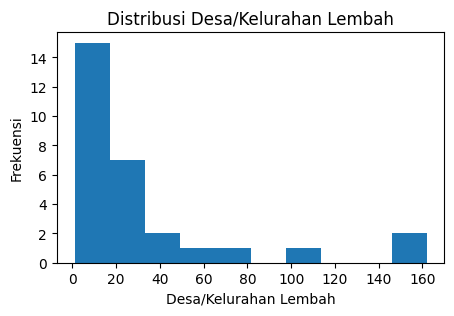

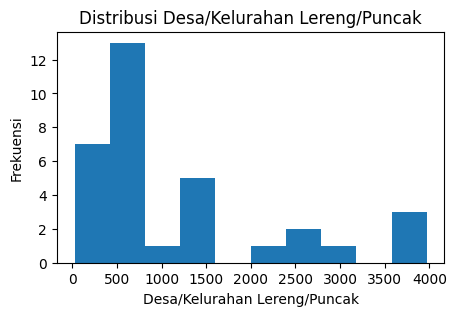

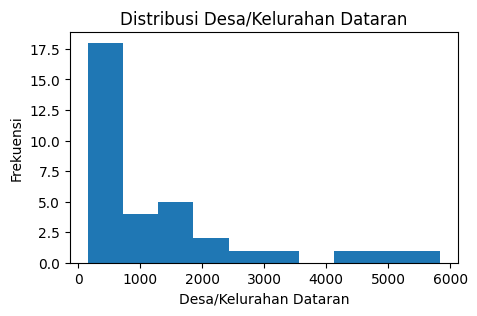

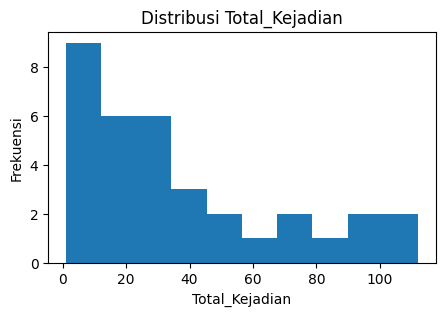

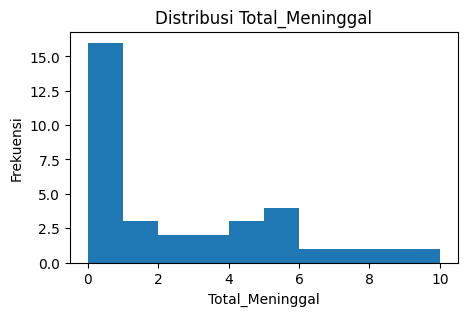

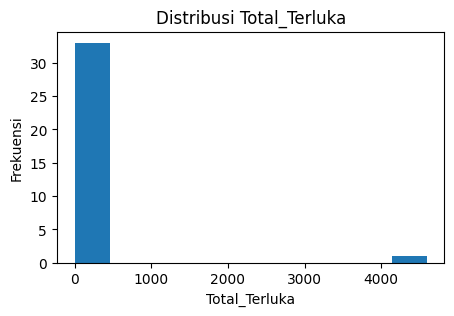

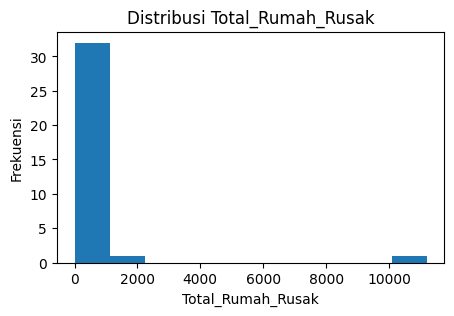

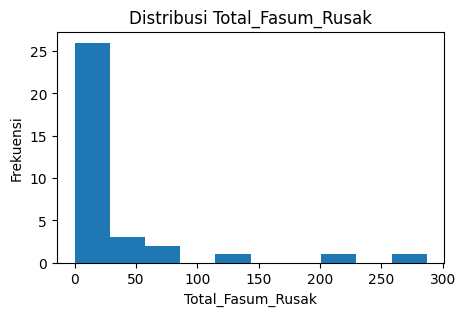

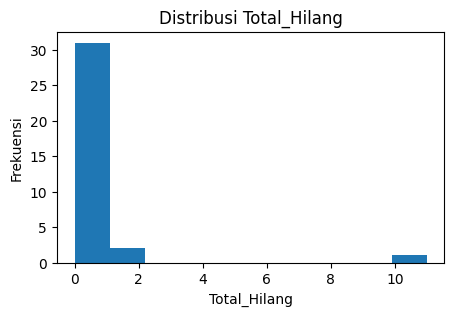

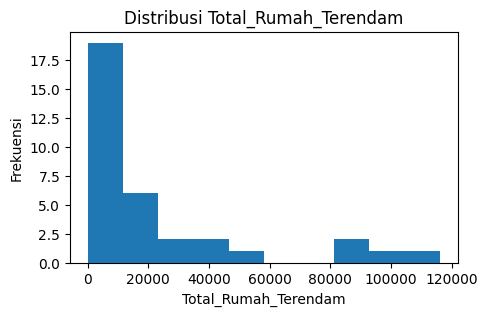

In [ ]:
numerical_cols = df_integrated_banjir.select_dtypes(include=['int','float']).columns

for col in numerical_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_integrated_banjir[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

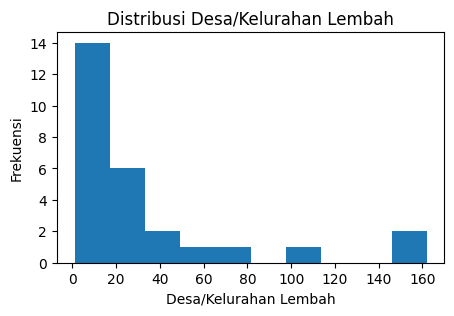

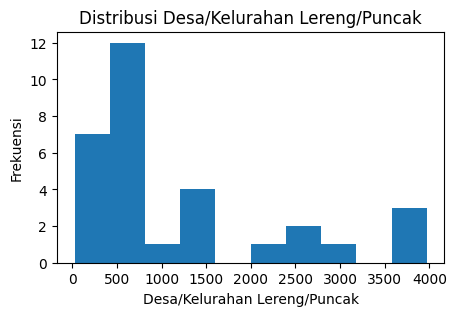

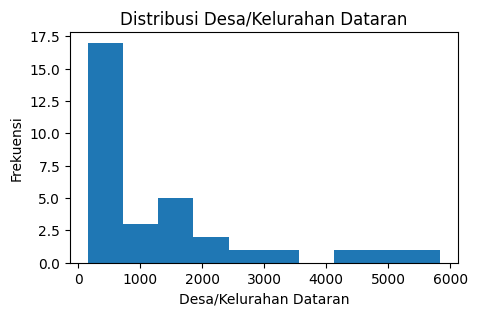

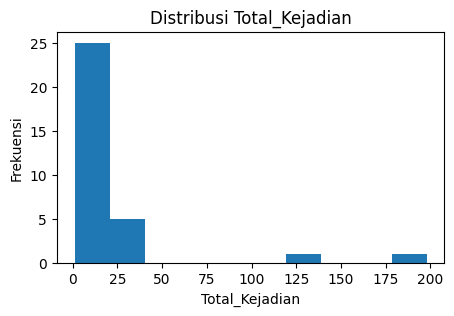

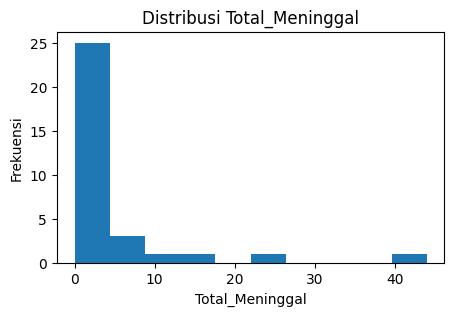

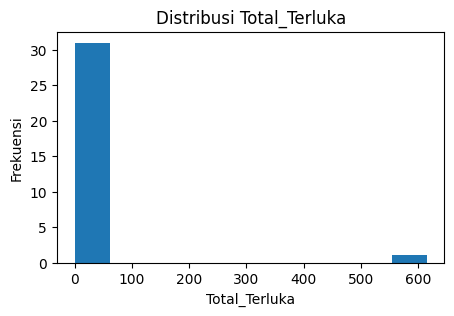

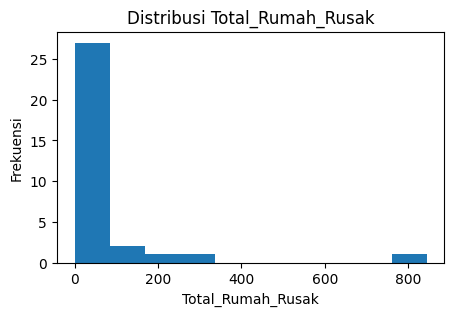

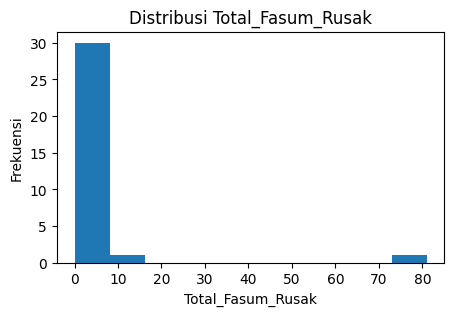

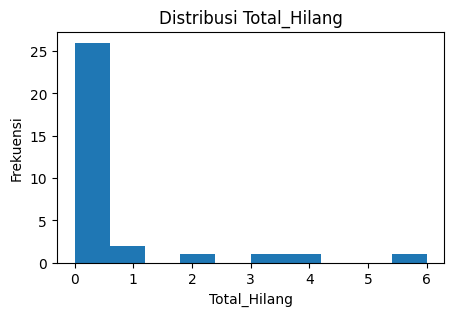

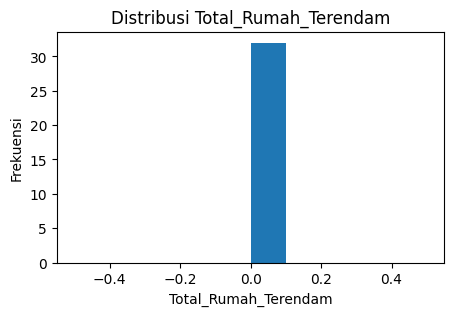

In [ ]:
numerical_cols = df_integrated_longsor.select_dtypes(include=['int','float']).columns

for col in numerical_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_integrated_longsor[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

In [ ]:
print(df_integrated_banjir.columns)

Index(['Provinsi', 'Desa/Kelurahan Lembah', 'Desa/Kelurahan Lereng/Puncak',
       'Desa/Kelurahan Dataran', 'Kejadian', 'Total_Kejadian',
       'Total_Meninggal', 'Total_Terluka', 'Total_Rumah_Rusak',
       'Total_Fasum_Rusak', 'Total_Hilang', 'Total_Rumah_Terendam'],
      dtype='object')


In [ ]:
print(df_integrated_longsor.columns)

Index(['Provinsi', 'Desa/Kelurahan Lembah', 'Desa/Kelurahan Lereng/Puncak',
       'Desa/Kelurahan Dataran', 'Kejadian', 'Total_Kejadian',
       'Total_Meninggal', 'Total_Terluka', 'Total_Rumah_Rusak',
       'Total_Fasum_Rusak', 'Total_Hilang', 'Total_Rumah_Terendam'],
      dtype='object')


In [ ]:
numerical_df_integratedb = df_integrated_banjir.select_dtypes(include=np.number)
numerical_df_integratedb.corr()

,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
Desa/Kelurahan Lembah,1.000000,0.778759,0.554977,0.306488,0.280700,-0.105497,-0.081106,-0.107126,0.268966,0.091297
Desa/Kelurahan Lereng/Puncak,0.778759,1.000000,0.576232,0.442808,0.561745,-0.080517,-0.113341,0.020148,0.472844,0.251306
Desa/Kelurahan Dataran,0.554977,0.576232,1.000000,0.591497,0.449046,-0.077692,0.076160,0.218608,0.062368,0.588587
Total_Kejadian,0.306488,0.442808,0.591497,1.000000,0.601337,0.202617,0.286643,0.536907,0.428159,0.716563
Total_Meninggal,0.280700,0.561745,0.449046,0.601337,1.000000,0.313054,0.003771,0.207414,0.611129,0.249354
Total_Terluka,-0.105497,-0.080517,-0.077692,0.202617,0.313054,1.000000,0.014211,0.129342,0.161269,0.000492
Total_Rumah_Rusak,-0.081106,-0.113341,0.076160,0.286643,0.003771,0.014211,1.000000,0.736168,-0.044834,0.393576
Total_Fasum_Rusak,-0.107126,0.020148,0.218608,0.536907,0.207414,0.129342,0.736168,1.000000,-0.019567,0.604525
Total_Hilang,0.268966,0.472844,0.062368,0.428159,0.611129,0.161269,-0.044834,-0.019567,1.000000,0.044898
Total_Rumah_Terendam,0.091297,0.251306,0.588587,0.716563,0.249354,0.000492,0.393576,0.604525,0.044898,1.000000


In [ ]:
numerical_df_integratedl = df_integrated_longsor.select_dtypes(include=np.number)
numerical_df_integratedl.corr()

,Desa/Kelurahan Lembah,Desa/Kelurahan Lereng/Puncak,Desa/Kelurahan Dataran,Total_Kejadian,Total_Meninggal,Total_Terluka,Total_Rumah_Rusak,Total_Fasum_Rusak,Total_Hilang,Total_Rumah_Terendam
Desa/Kelurahan Lembah,1.000000,0.776877,0.548207,0.099279,-0.051857,-0.095099,0.023872,0.056024,0.147537,NaN
Desa/Kelurahan Lereng/Puncak,0.776877,1.000000,0.572780,0.370838,0.109972,-0.032276,0.256324,0.222756,0.094427,NaN
Desa/Kelurahan Dataran,0.548207,0.572780,1.000000,0.444624,0.106317,-0.032113,0.327969,0.306076,0.253468,NaN
Total_Kejadian,0.099279,0.370838,0.444624,1.000000,0.440398,0.068053,0.900682,0.873813,0.056517,NaN
Total_Meninggal,-0.051857,0.109972,0.106317,0.440398,1.000000,0.030749,0.519307,0.422469,0.473813,NaN
Total_Terluka,-0.095099,-0.032276,-0.032113,0.068053,0.030749,1.000000,0.286590,0.100883,-0.054193,NaN
Total_Rumah_Rusak,0.023872,0.256324,0.327969,0.900682,0.519307,0.286590,1.000000,0.941665,0.073347,NaN
Total_Fasum_Rusak,0.056024,0.222756,0.306076,0.873813,0.422469,0.100883,0.941665,1.000000,0.056235,NaN
Total_Hilang,0.147537,0.094427,0.253468,0.056517,0.473813,-0.054193,0.073347,0.056235,1.000000,NaN
Total_Rumah_Terendam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


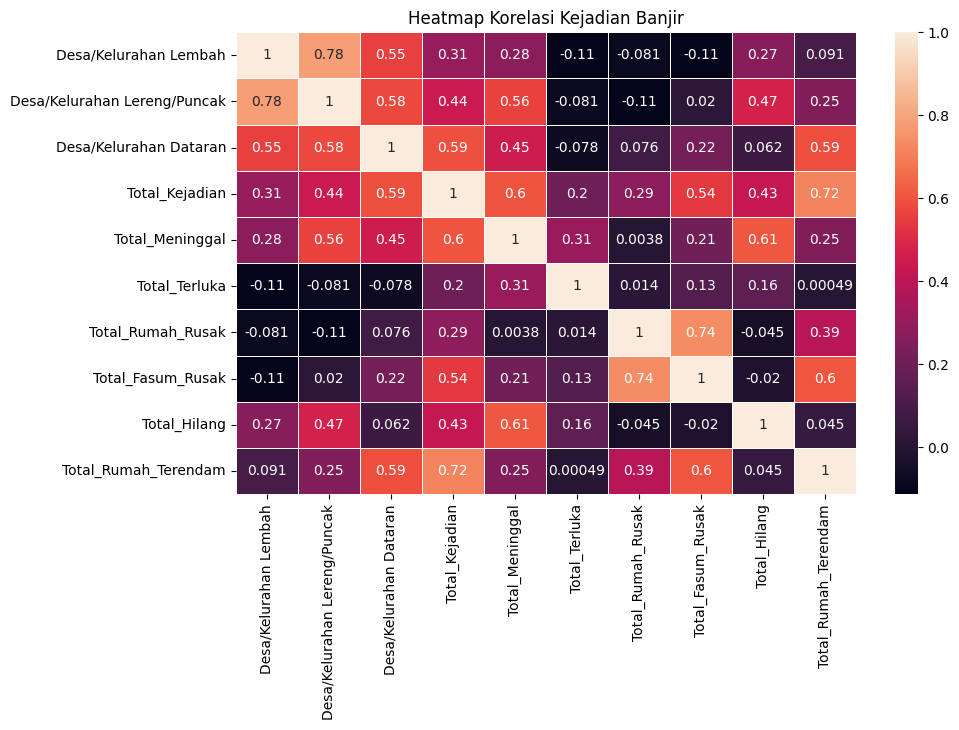

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df_integratedb.corr(), annot=True, linewidths=0.5)
plt.title("Heatmap Korelasi Kejadian Banjir")
plt.show()

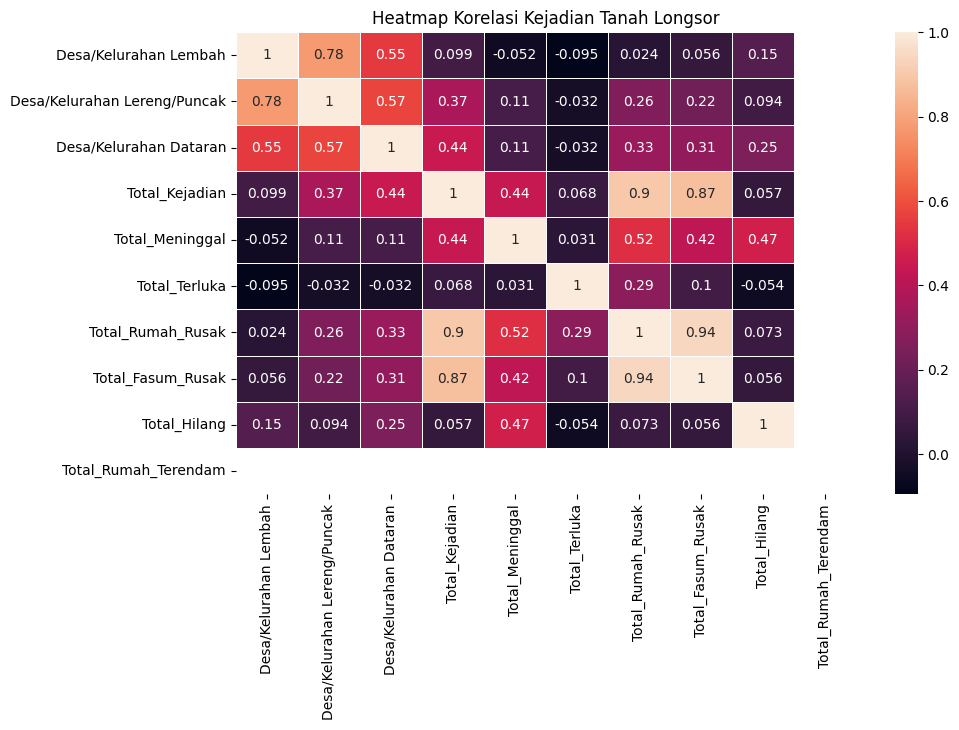

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df_integratedl.corr(), annot=True, linewidths=0.5)
plt.title("Heatmap Korelasi Kejadian Tanah Longsor")
plt.show()

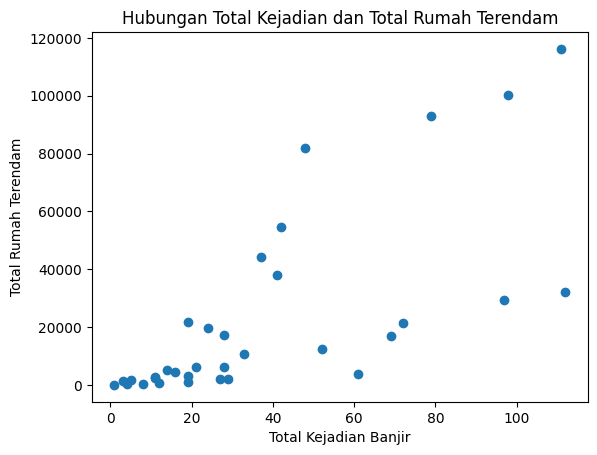

In [ ]:
plt.scatter(numerical_df_integratedb['Total_Kejadian'],
            numerical_df_integratedb['Total_Rumah_Terendam'])

plt.xlabel('Total Kejadian Banjir')
plt.ylabel('Total Rumah Terendam')
plt.title('Hubungan Total Kejadian dan Total Rumah Terendam')

plt.show()


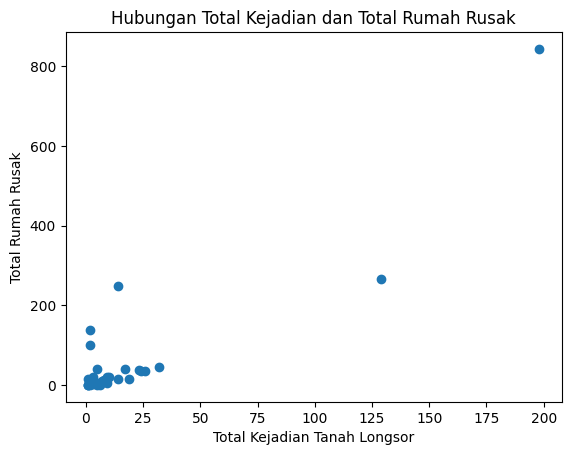

In [ ]:
plt.scatter(numerical_df_integratedl['Total_Kejadian'],
            numerical_df_integratedl['Total_Rumah_Rusak'])

plt.xlabel('Total Kejadian Tanah Longsor')
plt.ylabel('Total Rumah Rusak')
plt.title('Hubungan Total Kejadian dan Total Rumah Rusak')

plt.show()


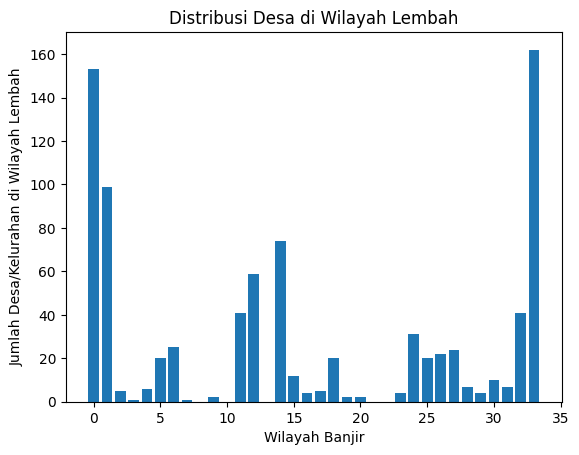

In [ ]:
numerical_df_integratedb = df_integrated_banjir.select_dtypes(include=np.number)
plt.bar(numerical_df_integratedb.index, numerical_df_integratedb['Desa/Kelurahan Lembah'])
plt.xlabel('Wilayah Banjir')
plt.ylabel('Jumlah Desa/Kelurahan di Wilayah Lembah')
plt.title('Distribusi Desa di Wilayah Lembah')
plt.show()

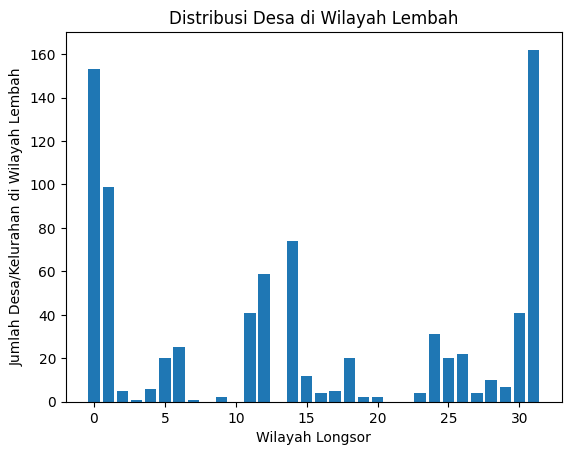

In [ ]:
numerical_df_integratedb = df_integrated_longsor.select_dtypes(include=np.number)
plt.bar(numerical_df_integratedb.index, numerical_df_integratedb['Desa/Kelurahan Lembah'])
plt.xlabel('Wilayah Longsor')
plt.ylabel('Jumlah Desa/Kelurahan di Wilayah Lembah')
plt.title('Distribusi Desa di Wilayah Lembah')
plt.show()

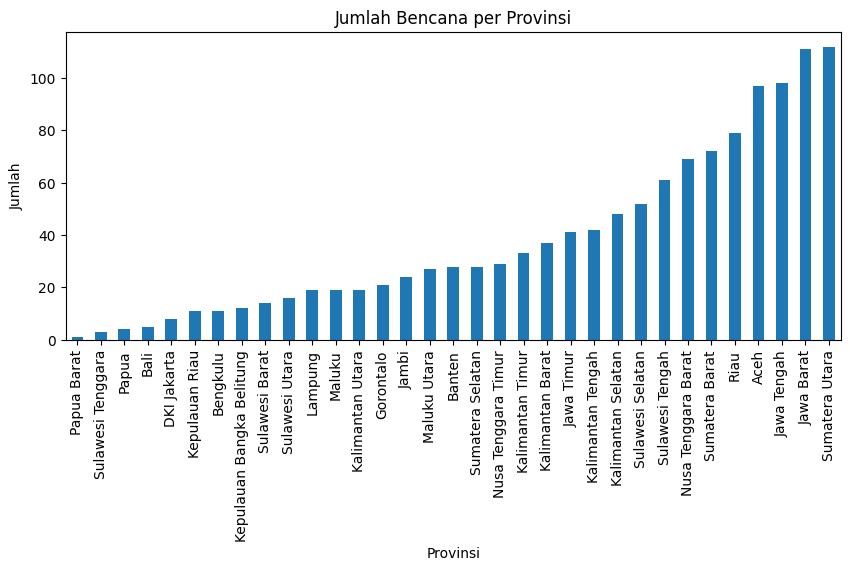

In [ ]:
df_integrated_banjir.groupby('Provinsi')['Total_Kejadian'].sum().sort_values().plot(kind='bar', figsize=(10,4))
plt.title('Jumlah Bencana per Provinsi')
plt.ylabel('Jumlah')
plt.show()

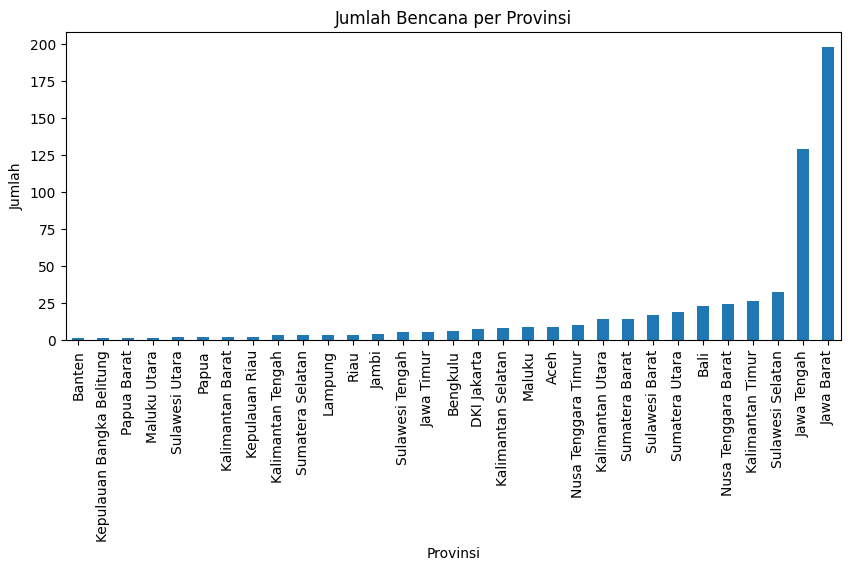

In [ ]:
df_integrated_longsor.groupby('Provinsi')['Total_Kejadian'].sum().sort_values().plot(kind='bar', figsize=(10,4))
plt.title('Jumlah Bencana per Provinsi')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
def kategori_kerentanan(x):
    if x < 50:
        return "Rendah"
    elif x < 200:
        return "Sedang"
    else:
        return "Tinggi"

df_integrated_banjir['jumlah_korban'] = df_integrated_banjir['Total_Meninggal'] + df_integrated_banjir['Total_Terluka'] + df_integrated_banjir['Total_Hilang']
df_integrated_banjir['kategori_kerentanan'] = df_integrated_banjir['jumlah_korban'].apply(kategori_kerentanan)
df_integrated_banjir['kategori_kerentanan'].value_counts()

,count
kategori_kerentanan,
Rendah,31
Sedang,1
Tinggi,1


In [ ]:
def kategori_kerentanan(x):
    if x < 50:
        return "Rendah"
    elif x < 200:
        return "Sedang"
    else:
        return "Tinggi"

df_integrated_longsor['jumlah_korban'] = df_integrated_longsor['Total_Meninggal'] + df_integrated_longsor['Total_Terluka'] + df_integrated_longsor['Total_Hilang']
df_integrated_longsor['kategori_kerentanan'] = df_integrated_longsor['jumlah_korban'].apply(kategori_kerentanan)
df_integrated_longsor['kategori_kerentanan'].value_counts()

,count
kategori_kerentanan,
Rendah,27
Sedang,3
Tinggi,1


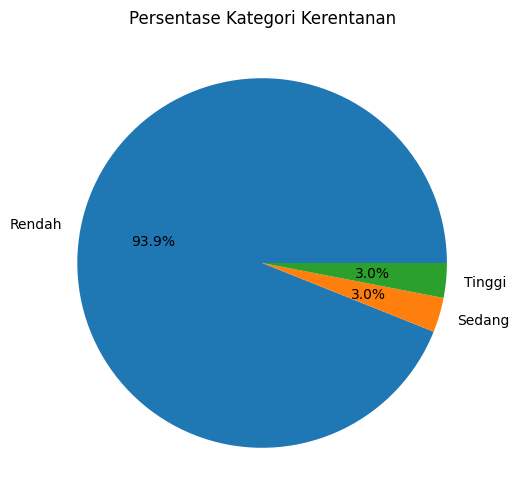

In [ ]:
df_integrated_banjir['kategori_kerentanan'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Persentase Kategori Kerentanan')
plt.ylabel('')
plt.show()

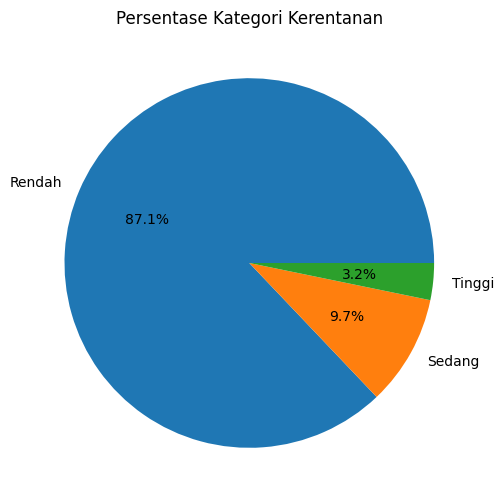

In [ ]:
df_integrated_longsor['kategori_kerentanan'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Persentase Kategori Kerentanan')
plt.ylabel('')
plt.show()